# Titanic Kaggle Dataset Challenge

## Data Loading

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

In [2]:
!pip install -U scikit-learn

In [3]:
gender_submission = pd.read_csv('gender_submission.csv')

test = pd.read_csv('test.csv')

train = pd.read_csv('train.csv')

In [4]:
gender_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## EDA 

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [9]:
train['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [10]:
train['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [11]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [12]:
train['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [13]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [14]:
train['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

## Feature Engineering

#### Ticket

Goal: To create a Ticket_Type column which displays whether the ticket beigns with a number or letter. I saw a pattern that some tickets began with a letter combination followed by numbers while some began simply with numbers. This pattern could be useful for our machine learning alogrithms to learn more about the passengers and their survivability.

Reason: The Ticket column contained unique values which were unsuited for our machine leanring algorithms to learn from. By simplfying the tickets into 2 values we may instead gain a valuable tool for predicting passenger's surviability. Essentially I want to reduce noise from numerous unique ticket prefixes/values while still capturing meaningful distinctions.

In [15]:
# Updated function to simplify Ticket_Type
def determine_ticket_type(ticket):
    if ticket[0].isalpha():  # Check if the first character is a letter
        return 1  # Assign 1 for tickets starting with a letter
    else:
        return 0  # Assign 0 for tickets starting with a number

# Create the Ticket_Type column in the train DataFrame
train['Ticket_Type'] = train['Ticket'].apply(determine_ticket_type)

In [16]:
train['Ticket_Type'].value_counts()

Ticket_Type
0    661
1    230
Name: count, dtype: int64

#### Title Column

Goal: To create a Title column which displays the passenger's title. I noticed that in the Name column, the titles were often followed by the passenger's name. This pattern could be useful for our machine learning alogrithms to learn more about the passengers and their survivability.

Reason: The Name column contained unique values which were unsuited for our machine leanring algorithms to learn from. By extracting the titles from the names, we may instead gain a valuable tool for predicting passenger's surviability. Essentially I want to reduce noise from numerous unique title prefixes/values while still capturing meaningful distinctions.

In [17]:
#Creation of Title column from Name column
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\root\AppData\Local\Temp\ipykernel_7524\1705106760.py:2: SyntaxWarning: invalid escape sequence '\.'
  train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [18]:
train['Title'].head(25)

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
5         Mr
6         Mr
7     Master
8        Mrs
9        Mrs
10      Miss
11      Miss
12        Mr
13        Mr
14      Miss
15       Mrs
16    Master
17        Mr
18       Mrs
19       Mrs
20        Mr
21        Mr
22      Miss
23        Mr
24      Miss
Name: Title, dtype: object

In [19]:
#Checking the values and counts in the Title column

train['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [20]:
train['Title'] = train['Title'].replace(['Mlle', 'Ms'], 'Miss')

train['Title'] = train['Title'].replace(['Major', 'Col', 'Capt'], 'Military')

train['Title'] = train['Title'].replace(['Countess', 'Sir', 'Lady', 'Don', 'Jonkheer'], 'Nobility')

train['Title'] = train['Title'].replace('Mme', 'Mrs')

In [21]:
#Checking once more the values and counts in the Title column

train['Title'].value_counts()

Title
Mr          517
Miss        185
Mrs         126
Master       40
Dr            7
Rev           6
Nobility      5
Military      5
Name: count, dtype: int64

#### Maiden Name Column

Goal: To create a Maiden column which extracts passenger's maiden name from the Name column.

Reason: To match families onboard the Titanic more accurately.

In [22]:
def extract_maiden_name(row):
    # Check if the 'Title' field is 'Mrs'
    if isinstance(row['Title'], str) and 'Mrs' in row['Title']:
        # Extract the last word from the 'Name' field and remove any trailing ')'
        maiden_name = row['Name'].split()[-1].strip(')')
        return maiden_name
    return 'None'

# Apply the function to create a new 'Maiden' column
train['Maiden'] = train.apply(extract_maiden_name, axis=1)


In [23]:
train['Maiden']

0        None
1      Thayer
2        None
3        Peel
4        None
        ...  
886      None
887      None
888      None
889      None
890      None
Name: Maiden, Length: 891, dtype: object

#### Surname Column

Goal: To create a Surname column which extracts passenger's surname from the Name column.

Reason: To match families onboard the Titanic more accurately.

In [24]:
# Create a new column 'Surname' by extracting the first word from the 'Name' column and removing trailing commas
train['Surname'] = train['Name'].apply(lambda name: name.split()[0].rstrip(','))

In [25]:
train['Surname']

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: Surname, Length: 891, dtype: object

#### Creation of Family Column

Goal: Create a family column to match families on board the Titanic effectively

Reason: To perhaps provide an important tool for our machine learning algorithms to predict passenger survivability.

In [26]:
def determine_family(row, train):
    # Check if the passenger has any family members (Parch or SibSp > 0)
    if row['Parch'] > 0 or row['SibSp'] > 0:
        # Start with Surname
        family_name = row['Surname']
        # Check if there are other passengers with the same Surname
        family_members = train[(train['Surname'] == family_name) & (train.index != row.name)]
        if family_members.empty:  # If no other family members with the same Surname
            family_name = row['Maiden']  # Use Maiden name
    else:
        family_name = 'No Family'  # No family found

    return family_name

# Apply the function to create the 'Family' column
train['Family'] = train.apply(lambda row: determine_family(row, train), axis=1)

In [27]:
train['Family'].head(20)

0        Braund
1        Thayer
2     No Family
3      Futrelle
4     No Family
5     No Family
6     No Family
7       Palsson
8       Johnson
9        Nasser
10    Sandstrom
11    No Family
12    No Family
13    Andersson
14    No Family
15    No Family
16         Rice
17    No Family
18       Vander
19    No Family
Name: Family, dtype: object

#### Update Cabin Column

In [28]:
#I believe that NA values in the cabin column are because the passenger did not have a cabin, so I will replace them with 'No Cabin'.
train['Cabin'] = train['Cabin'].fillna('No Cabin')

#### Filling missing Age values

In [29]:
# Group by Pclass and calculate the median age for each class
median_ages = train.groupby('Pclass')['Age'].median()

# Save the median age values to variables
median_age_pclass1 = median_ages.loc[1]
median_age_pclass2 = median_ages.loc[2]
median_age_pclass3 = median_ages.loc[3]

# Define a function to fill missing Age values based on Pclass
def fill_missing_age(row):
    if pd.isnull(row['Age']):
        if row['Pclass'] == 1:
            return median_age_pclass1
        elif row['Pclass'] == 2:
            return median_age_pclass2
        elif row['Pclass'] == 3:
            return median_age_pclass3
    else:
        return row['Age']

# Apply the function to fill missing Age values
train['Age'] = train.apply(fill_missing_age, axis=1)

#### Categorize Age Values

Goal: To create a new column called Age_Group which categorizes passenger ages into reasonably balanced quartiles. Reasonably meaning that each quartile should be somewhat equal in its amount, but importantly still showcases the real distribution of the data as well.

Reason: The Machine Learning Algorithms that we will use detect patterns better when the data is balanced, meaning that each Age Group will have a comparable weight within the analysis. Furthermore it simplifies the data. Instead of dealing with continuous values (values which can thoeretically be infintely precise), you can analyze whether being in a particular quartile impacts survival probability. Finally, the reason 4 bins were selected instead of for example 10 or 20 bins is because the risk of overfitting grows as the amount of bins grows. We want the bins to be enough for our Machine Learning algorithms to efectively learn a pattern but not so much that the model learns simply the tiny details of our dataset without being able to effectively generalize about new data. 4 bins provides enough granularity to capture broad patterns while also remaining interpretable.

In [30]:
# Create quantile-based bins for Age
train['Age_Group'] = pd.qcut(train['Age'], q=4, labels=['Young', 'Young Adult', 'Adult', 'Senior'])

# Inspect the result
print(train[['Age', 'Age_Group']].head())

    Age    Age_Group
0  22.0        Young
1  38.0       Senior
2  26.0  Young Adult
3  35.0        Adult
4  35.0        Adult


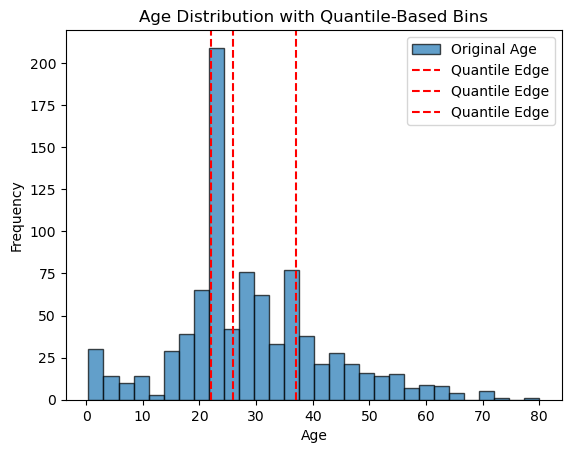

In [31]:
# Plot histogram of Age with original values
plt.hist(train['Age'].dropna(), bins=30, edgecolor='black', alpha=0.7, label='Original Age')

# Add vertical lines for bin edges based on quantiles
quantile_edges = train['Age'].quantile([0.25, 0.5, 0.75]).values  # Quartiles (25%, 50%, 75%)
for edge in quantile_edges:
    plt.axvline(edge, color='red', linestyle='--', label='Quantile Edge')

# Customize and display the plot
plt.title('Age Distribution with Quantile-Based Bins')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [32]:
# Count the number of values in each quartile
train['Age_Group'].value_counts()

Age_Group
Adult          248
Young          231
Young Adult    224
Senior         188
Name: count, dtype: int64

#### Categorize Fare Values

Goal: To create a new column called Fare_Amount which categorizes passenger fares into reasonably balanced quartiles. Reasonably meaning that each quartile should be somewhat equal in its amount, but importantly still showcases the real distribution of the data as well.

Reason: The Machine Learning Algorithms that we will use detect patterns better when the data is balanced, meaning that each Age Group will have a comparable weight within the analysis. Furthermore it simplifies the data. Instead of dealing with continuous values (values which can thoeretically be infintely precise), you can analyze whether being in a particular quartile, range of values, impacts survival probability. Finally, the reason 4 bins were selected instead of for example 10 or 20 bins is because the risk of overfitting grows as the amount of bins grows. We want the bins to be enough for our Machine Learning algorithms to efectively learn a pattern but not so much that the model learns simply the tiny details of our dataset without being able to effectively generalize about new data. 4 bins provides enough granularity to capture broad patterns while also remaining interpretable.

In [33]:
# Create quantile-based bins for Fare
train['Fare_Amount'] = pd.qcut(train['Fare'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Inspect the new column
print(train[['Fare', 'Fare_Amount']].head())

      Fare Fare_Amount
0   7.2500         Low
1  71.2833   Very High
2   7.9250      Medium
3  53.1000   Very High
4   8.0500      Medium


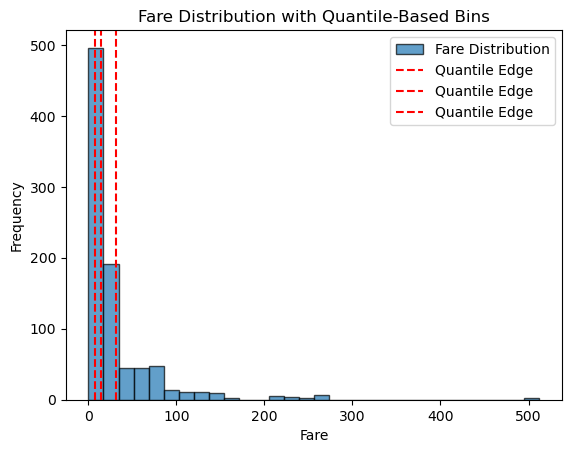

In [34]:
# Plot histogram of continuous Fare values
plt.hist(train['Fare'].dropna(), bins=30, edgecolor='black', alpha=0.7, label='Fare Distribution')

# Add vertical lines for Fare quantile edges (if using quantiles)
quantile_edges = train['Fare'].quantile([0.25, 0.5, 0.75]).values
for edge in quantile_edges:
    plt.axvline(edge, color='red', linestyle='--', label='Quantile Edge')

# Customize the plot
plt.title('Fare Distribution with Quantile-Based Bins')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [35]:
train['Fare_Amount'].value_counts()

Fare_Amount
Medium       224
Low          223
High         222
Very High    222
Name: count, dtype: int64


#### Fill missing Embarked values

In [36]:
train['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [37]:
train['Embarked'] = train['Embarked'].fillna('S')

#### Cabin Letter

In [38]:
#Simplified version of the Cabin column to create smaller types of categories of cabins which will be easier to analyze.

train['Cabin_Letter'] = train['Cabin'].astype(str).str[0]

In [39]:
train['Cabin_Letter']

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin_Letter, Length: 891, dtype: object

#### Family Size

In [40]:
# Create a new column 'Family_Size' by adding the 'Parch' and 'SibSp' amounts together

train['Family_Size'] = train['Parch'] + train['SibSp']

#### Family Onboard column

In [41]:
# Define a function to determine Family_Onboard
def determine_family_onboard(family_size):
    if family_size < 1:
        return 0  # No family onboard
    else:
        return 1  # Family onboard

# Apply the function to create the Family_Onboard column
train['Family_Onboard'] = train['Family_Size'].apply(determine_family_onboard)

# Verify the new column
print(train[['Family_Size', 'Family_Onboard']].head())

   Family_Size  Family_Onboard
0            1               1
1            1               1
2            0               0
3            1               1
4            0               0


#### Final dataframe

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PassengerId     891 non-null    int64   
 1   Survived        891 non-null    int64   
 2   Pclass          891 non-null    int64   
 3   Name            891 non-null    object  
 4   Sex             891 non-null    object  
 5   Age             891 non-null    float64 
 6   SibSp           891 non-null    int64   
 7   Parch           891 non-null    int64   
 8   Ticket          891 non-null    object  
 9   Fare            891 non-null    float64 
 10  Cabin           891 non-null    object  
 11  Embarked        891 non-null    object  
 12  Ticket_Type     891 non-null    int64   
 13  Title           891 non-null    object  
 14  Maiden          891 non-null    object  
 15  Surname         891 non-null    object  
 16  Family          891 non-null    object  
 17  Age_Group       

## Hot Encode Data

In [43]:
#Preparing the data analysis. Category columns are converted to a category type and then one-hot encoded.

categorical_cols = ['Sex', 'Embarked', 'Title', 'Cabin_Letter', 'Family_Onboard', 'Ticket_Type', 'Age_Group', 'Fare_Amount', 'Parch', 'SibSp', 'Family_Size', 'Family', 'Maiden', 'Surname', 'Age', 'Fare']

for col in categorical_cols:
    train[col] = train[col].astype('category')
    
train = pd.get_dummies(train, columns=['Sex', 'Embarked', 'Title', 'Cabin_Letter', 'Ticket_Type', 'Family_Onboard', 'Age_Group', 'Fare_Amount', 'Parch', 'SibSp', 'Family_Size', 'Family', 'Maiden', 'Surname', 'Age', 'Fare'], drop_first=True)

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 1307 entries, PassengerId to Fare_512.3292
dtypes: bool(1301), int64(3), object(3)
memory usage: 1.1+ MB


## Anaylsis

In [45]:
# Loading necessary libraries for the data analysis

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report

from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.svm import SVC



### Logistic Regression Analysis

#### Original Logistic Regression Analysis

In [46]:
# Define the features to use for the model
features = [col for col in train.columns if col not in ['PassengerId', 'Survived', 'Name', 'Cabin', 'Ticket']]

# Select the features and target variable
X = train[features]
y = train['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.8435754189944135
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       105
           1       0.81      0.81      0.81        74

    accuracy                           0.84       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.84      0.84      0.84       179



C:\Users\root\AppData\Local\Temp\ipykernel_7524\2649806963.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', color='gray')  # Diagonal reference line


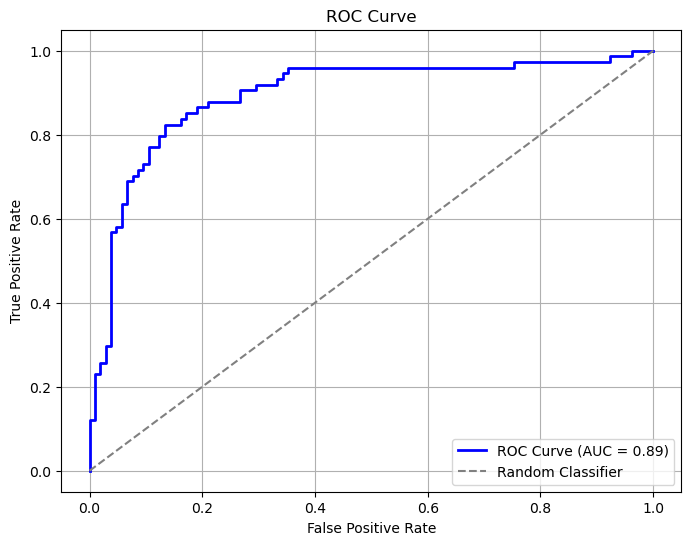

ROC-AUC Score: 0.8943371943371943


In [47]:
# Get the predicted probabilities for the positive class (Survived = 1)
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', color='gray')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

print(f"ROC-AUC Score: {roc_auc}")

#### Class-Weighted and SMOTE Logistic Regression Analysis

In [48]:
# Define the features to use for the model
features = [col for col in train.columns if col not in ['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin']]

# Select the features and target variable
X = train[features]
y = train['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Option 1: Logistic Regression with class_weight='balanced'
print("Using class_weight='balanced':")
model_balanced = LogisticRegression(max_iter=1000, class_weight='balanced')
model_balanced.fit(X_train, y_train)
y_pred_balanced = model_balanced.predict(X_test)

# Evaluate the model
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
report_balanced = classification_report(y_test, y_pred_balanced)
print(f"Accuracy: {accuracy_balanced}")
print(f"Classification Report:\n{report_balanced}")

# Option 2: Logistic Regression with SMOTE
print("\nUsing SMOTE for oversampling:")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model_smote = LogisticRegression(max_iter=1000)
model_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = model_smote.predict(X_test)

# Evaluate the model
accuracy_smote = accuracy_score(y_test, y_pred_smote)
report_smote = classification_report(y_test, y_pred_smote)
print(f"Accuracy: {accuracy_smote}")
print(f"Classification Report:\n{report_smote}")

Using class_weight='balanced':
Accuracy: 0.8379888268156425
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       105
           1       0.78      0.85      0.81        74

    accuracy                           0.84       179
   macro avg       0.83      0.84      0.84       179
weighted avg       0.84      0.84      0.84       179


Using SMOTE for oversampling:


c:\Users\root\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Accuracy: 0.8268156424581006
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       105
           1       0.75      0.88      0.81        74

    accuracy                           0.83       179
   macro avg       0.82      0.83      0.83       179
weighted avg       0.84      0.83      0.83       179



C:\Users\root\AppData\Local\Temp\ipykernel_7524\929287294.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', color='gray')  # Diagonal reference line


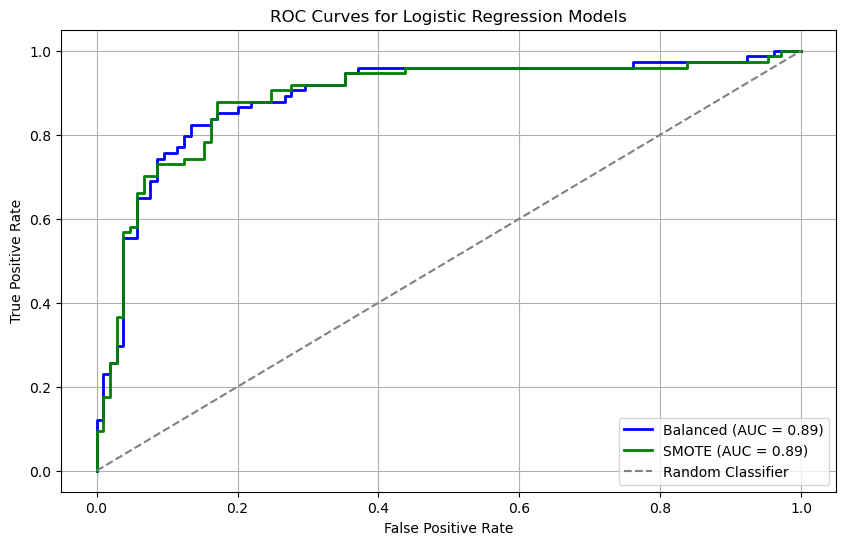

In [49]:
# ROC-AUC Analysis for class_weight='balanced'
y_prob_balanced = model_balanced.predict_proba(X_test)[:, 1]
fpr_balanced, tpr_balanced, _ = roc_curve(y_test, y_prob_balanced)
roc_auc_balanced = roc_auc_score(y_test, y_prob_balanced)

# ROC-AUC Analysis for SMOTE
y_prob_smote = model_smote.predict_proba(X_test)[:, 1]
fpr_smote, tpr_smote, _ = roc_curve(y_test, y_prob_smote)
roc_auc_smote = roc_auc_score(y_test, y_prob_smote)

# Plotting the ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_balanced, tpr_balanced, label=f'Balanced (AUC = {roc_auc_balanced:.2f})', color='blue', linewidth=2)
plt.plot(fpr_smote, tpr_smote, label=f'SMOTE (AUC = {roc_auc_smote:.2f})', color='green', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', color='gray')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Logistic Regression Models')
plt.legend(loc='lower right')
plt.grid()
plt.show()

#### Logistic Regression Summary

1. Logistic Regression
    - **Accuracy (0.8436)**: Meaning approximately 84.4% of the test set predictions are correct.
    - Precision 
        - For class 0 (non-survivors): 87%, meaning that 87% of passengers predicted as non-survivors were actually non-survivors.
        - For class 1 (survivors): 81%, meaning that 81% of passengers predicted as survivors were actually survivors.
    - Recall
        - For class 0: 87%, meaning the model correctly identified 87% of the actual non-survivors.
        - For class 1: 81%, meaning the model correctly identified 81% of the actual survivors.
    - F1 Score
        - For class 0 (0.87) is slightly better than for class 1 (0.81), indicating the model is a bit better at predicting non-survivors.
    - Support
        - There were 105 actual non-survivors and 74 actual survivors in the test set.
    - ROC-AUC Score: 0.89 indicates that the model has a very good generalization ability.


------------------------------------------------------------------------------------------------------------------------------------------------------------


2. Class-Weighted Logistic Regression
    - **Accuracy (0.8379)**: Meaning approximately 83.8% of the test set predictions are correct.
    - Precision
        - For class 0 (non-survivors): 89%, meaning that 89% of passengers predicted as non-survivors were actually non-survivors.
        - For class 1 (survivors): 78%, meaning that 78% of passengers predicted as survivors were actually survivors.
    - Recall
        - For class 0: 83%, meaning the model correctly identified 83% of the actual non-survivors.
        - For class 1: 85%, meaning the model correctly identified 85% of the actual survivors.
    - F1 Score
        - For class 0 (0.84) is slightly better than for class 1 (0.81), indicating the model is still a bit better at predicting non-survivors.
    - Support
        - There were 105 actual non-survivors and 74 actual survivors in the test set.
    - ROC-AUC Score: 0.89 indicates that the model has a very good generalization ability.


------------------------------------------------------------------------------------------------------------------------------------------------------------


3. SMOTE Logistic Regression
    - **Accuracy (0.8268)**: Meaning approximately 82.7% of the test set predictions are correct.
    - Precision
        - For class 0 (non-survivors): 90%, meaning that 90% of passengers predicted as non-survivors were actually non-survivors.
        - For class 1 (survivors): 75%, meaning that 75% of passengers predicted as survivors were actually survivors.
    - Recall
        - For class 0: 79%, meaning the model correctly identified 79% of the actual non-survivors.
        - For class 1: 88%, meaning the model correctly identified 88% of the actual survivors.
    - F1 Score
        - For class 0 (0.84) is slightly better than for class 1 (0.81), indicating the model is a bit better at predicting non-survivors.
    - Support
        - There were once more 105 actual non-survivors and 74 actual survivors in the test set.
    - ROC-AUC Score: 0.89 indicates that the model has a very good generalization ability. This score is impressively tied for the highest score held by the Original Logisitic Regression model.



### Decision Tree Analysis

In [50]:
# Initialize and fit the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
dt_y_pred = dt_model.predict(X_test)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_report = classification_report(y_test, dt_y_pred)

print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"Decision Tree Classification Report:\n{dt_report}")

Decision Tree Accuracy: 0.8324022346368715
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       105
           1       0.79      0.81      0.80        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179



C:\Users\root\AppData\Local\Temp\ipykernel_7524\596541270.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', color='gray')  # Diagonal reference line


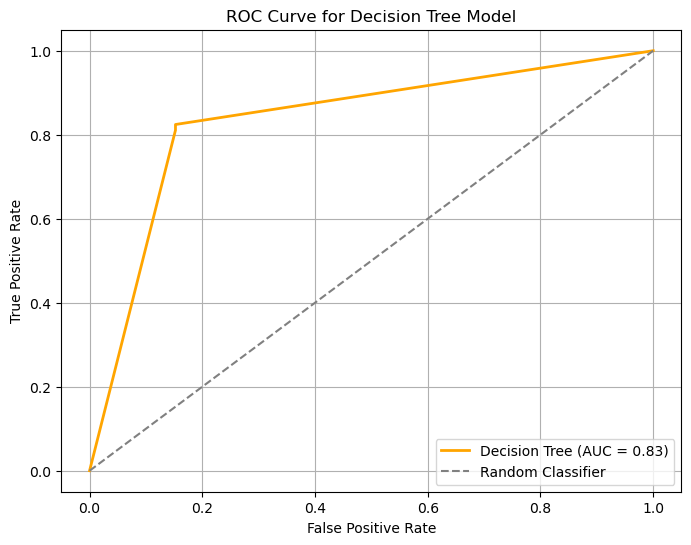

ROC-AUC Score: 0.8349420849420849


In [51]:
# Get the predicted probabilities for the positive class (Survived = 1)
dt_y_prob = dt_model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt_y_prob)

# Calculate the ROC-AUC score
dt_roc_auc = roc_auc_score(y_test, dt_y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_roc_auc:.2f})', color='orange', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', color='gray')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Model')
plt.legend(loc='lower right')
plt.grid()
plt.show()

print(f"ROC-AUC Score: {dt_roc_auc}")

#### Decision Tree Summary

4. Decision Tree Analysis
    - **Accuracy (0.8324)**: Meaning approximately 83% of the test set predictions are correct.
    - Precision
        - For class 0 (non-survivors): 86%, meaning that 86% of passengers predicted as non-survivors were actually non-survivors.
        - For class 1 (survivors): 79%, meaning that 79% of passengers predicted as survivors were actually survivors.
    - Recall
        - For class 0: 85%, meaning the model correctly identified 85% of the actual non-survivors.
        - For class 1: 81%, meaning the model correctly identified 81% of the actual survivors.
    - F1 Score
        - For class 0 (0.86) is slightly better than for class 1 (0.80), indicating the model is a bit better at predicting non-survivors.
    - Support
        - There were 105 actual non-survivors and 74 actual survivors in the test set.
    - ROC-AUC Score: 83%, which is significantly lower than the Logisitic Regression models. This suggests that the Decision Tree model is performing at a lower level in comparison to the Logisitc Regression models. The shape of the curve is also much more different indicating possible overfitting.


### Random Forest Analysis

In [52]:
# Initialize and fit the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_report = classification_report(y_test, rf_y_pred)

print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Random Forest Classification Report:\n{rf_report}")

Random Forest Accuracy: 0.8156424581005587
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



C:\Users\root\AppData\Local\Temp\ipykernel_7524\2735305438.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', color='gray')  # Diagonal reference line


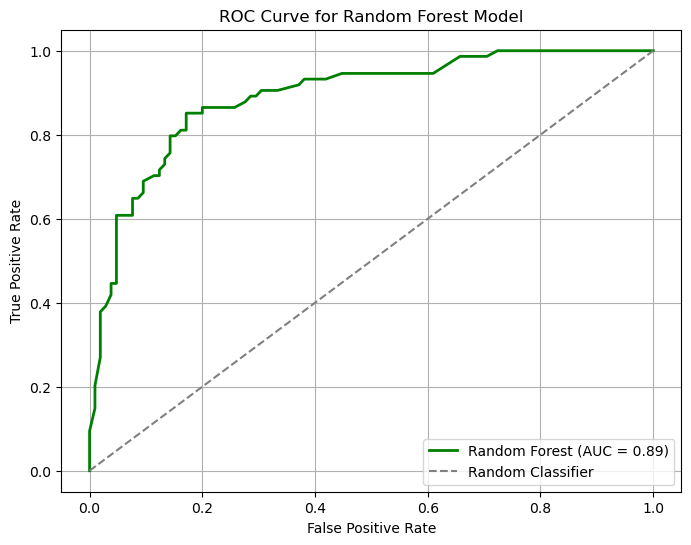

ROC-AUC Score: 0.8907979407979408


In [53]:
# Get the predicted probabilities for the positive class (Survived = 1)
rf_y_prob = rf_model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_y_prob)

# Calculate the ROC-AUC score
rf_roc_auc = roc_auc_score(y_test, rf_y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_roc_auc:.2f})', color='green', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', color='gray')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Model')
plt.legend(loc='lower right')
plt.grid()
plt.show()

print(f"ROC-AUC Score: {rf_roc_auc}")

#### Random Forest Summary

5. Random Forest Analysis
    - **Accuracy (0.8156)**: Meaning approximately 81.6% of the test set predictions are correct.
    - Precision
        - For class 0 (non-survivors): 83%, meaning that 83% of passengers predicted as non-survivors were actually non-survivors.
        - For class 1 (survivors): 79%, meaning that 79% of passengers predicted as survivors were actually survivors.
    - Recall
        - For class 0: 86%, meaning the model correctly identified 86% of the actual non-survivors.
        - For class 1: 76%, meaning the model correctly identified 76% of the actual survivors.
    - F1 Score
        - For class 0 (0.85) is slightly better than for class 1 (0.77), indicating the model is a bit better at predicting non-survivors.
    - Support
        - There were 105 actual non-survivors and 74 actual survivors in the test set.
    - ROC-AUC Score: 89%, which is marginally lower than the Logisitic Regression models. This suggests that the Random Forest model is performing at close to the same level as the Logistic Regression models.

### Gradient Boosting Analysis

In [54]:
# Initialize and fit the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
gb_y_pred = gb_model.predict(X_test)

# Evaluate the model
gb_accuracy = accuracy_score(y_test, gb_y_pred)
gb_report = classification_report(y_test, gb_y_pred)

print(f"Gradient Boosting Accuracy: {gb_accuracy}")
print(f"Gradient Boosting Classification Report:\n{gb_report}")

Gradient Boosting Accuracy: 0.8156424581005587
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



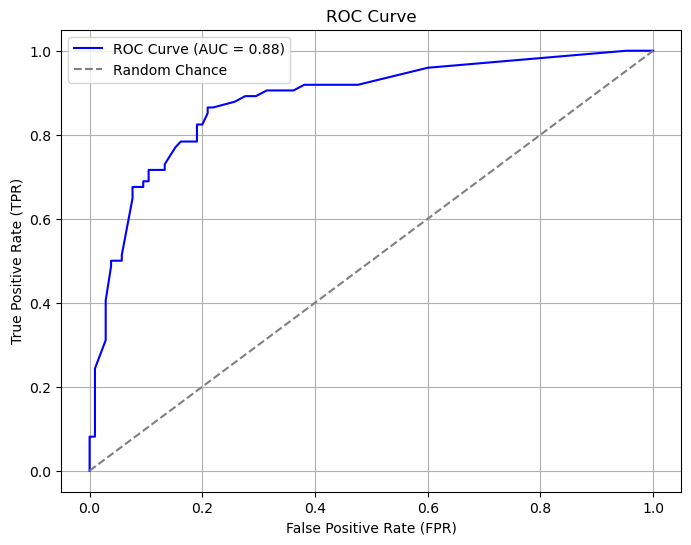

In [55]:
# Predict probabilities for the positive class
y_probs = gb_model.predict_proba(X_test)[:, 1]  # Use [:, 1] for the positive class probabilities

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

#### Gradient Boosting Summary 

6. Gradient Boosting Analysis
    - **Accuracy (0.8156)**: Meaning approximately 81.6% of the test set predictions are correct.
    - Precision
        - For class 0 (non-survivors): 82%, meaning that 82% of passengers predicted as non-survivors were actually non-survivors.
        - For class 1 (survivors): 82%, meaning that 82% of passengers predicted as survivors were actually survivors.
    - Recall
        - For class 0: 89%, meaning the model correctly identified 89% of the actual non-survivors.
        - For class 1: 72%, meaning the model correctly identified 72% of the actual survivors.
    - F1 Score
        - For class 0 (0.85) is slightly better than for class 1 (0.76), indicating the model is a bit better at predicting non-survivors.
    - Support
        - There were 105 actual non-survivors and 74 actual survivors in the test set.
    - ROC-AUC Score: 0.88, which is very close to the Logisitic Regression model's scores mentioned previously. This suggests that the Gradient Boosting model is performing a simlar, but also slightly worse level than the Logisitic Regression models.

### Support Vector Machine

In [60]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy}")
print(f"SVM Classification Report:\n{rf_report}")

SVM Accuracy: 0.8379888268156425
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



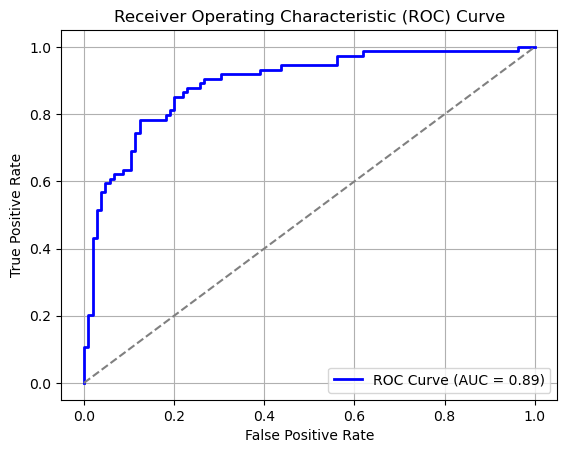

In [59]:
from sklearn.metrics import auc

# Get the probability estimates for the positive class
y_prob = svm_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

#### Support Vector Machine Summary

6. Support Vector Machine Analysis
    - **Accuracy (0.8379)**: Meaning approximately 83.8% of the test set predictions are correct.
    - Precision
        - For class 0 (non-survivors): 83%, meaning that 83% of passengers predicted as non-survivors were actually non-survivors.
        - For class 1 (survivors): 79%, meaning that 79% of passengers predicted as survivors were actually survivors.
    - Recall
        - For class 0: 86%, meaning the model correctly identified 86% of the actual non-survivors.
        - For class 1: 76%, meaning the model correctly identified 76% of the actual survivors.
    - F1 Score
        - For class 0 (0.85) is slightly better than for class 1 (0.77), indicating the model is a bit better at predicting non-survivors.
    - Support
        - There were 105 actual non-survivors and 74 actual survivors in the test set.
    - ROC-AUC Score: 0.89, which is very close to the Logisitic Regression model's scores mentioned previously. This suggests that the Gradient Boosting model is performing a simlar, but also slightly worse level than the Logisitic Regression models.

## Conclusion

The Original Logisitic Regression Model achieved the highest overall Accuracy Score, however the Class-Weighted Logistic Regression model stood out for its fairness between both classes and overall high accuracy. This makes the Class-Weighted Model more suitable for scenarios where balance is critical. On the other hand, SMOTE and Gradient Boosting also provided alternative approaches for improving minority class performance, though with trade-offs in recall or precision.

For models like Decision Trees and Random Forests, further hyperparameter tuning or the use of ensemble techniques (e.g., bagging or boosting) could enhance their performance. The Gradient Boosting model, while slightly less accurate overall, might also excel with refined parameters like learning rate or tree depth.

The ROC curve for all models, except the Decision Tree Analysis, showed a similar shape. This indicates that those models were not overfitting. These models all had score between 0.90 and 0.88 which are very good. This means that these models were able to effectively distinguish between positive and negative classes (survivors and non-survivors). However, the Decision Tree model appeared to lag behind in this respect.